# Third Place Report [V2022]
### Contribution to Architectural Institute of Korea


-----
* Inital research, [MIT Media Lab, City Science](https://www.media.mit.edu/groups/city-science/overview/) <br>
  [Third Place Mobility Energy Consumption Per Person](http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab/index.html) <br>
   <br>

* Paper <br>
  [Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore](https://doi.org/10.1007/978-981-33-4400-6_11)  <br>
  

* Contribution <br> [대한건축학회 : Architectural Institute of Korea](https://www.aik.or.kr/)
  제3 공간 분석과 적용 (디자인, 데이터, 인공지능)  <br> https://brunch.co.kr/@njnamju/148 <br>


-----
#### Author: NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

# 2. Parsing, Processing, Visualizing Data

## 2.1 import and Merge data, JSON

In [1]:
import json
import glob

In [2]:
def OpenJson(path): 
    json_file = open(path , 'r')
    json_str = json_file.read()
    json_data = json.loads(json_str)
    return json_data

In [3]:
THE_PATH = 'data/raw/Boston/' 
path = glob.glob(THE_PATH + "*.json") # load all third places data

In [4]:
dataDic = {}

for i in path:
    DATA_DIC = OpenJson(i)
    if len(DATA_DIC) == 0:
        DATA_DIC = [{
            "lat": 0,
            "lon": -0
        }]
    thirdPlaceName = (i.split('\\')[-1].split('.')[0]) # Class from third place names

    classList = []
    for i in DATA_DIC:
        if i not in classList:
            classList.append(i)

    dataDic[thirdPlaceName] = classList

In [5]:
print(dataDic['zoo'])

[{'lat': 42.302786, 'lon': -71.08681}, {'lat': 42.3028267, 'lon': -71.08769110000001}, {'lat': 42.3038148, 'lon': -71.0943459}, {'lat': 42.32797410000001, 'lon': -71.0672628}, {'lat': 42.30518939999999, 'lon': -71.0836683}, {'lat': 42.3101393, 'lon': -71.073919}, {'lat': 42.3228563, 'lon': -71.09620280000001}, {'lat': 42.2920594, 'lon': -71.0846765}, {'lat': 42.3114736, 'lon': -71.09444169999999}, {'lat': 42.3089348, 'lon': -71.1016576}]


In [6]:
for i in dataDic['zoo']:
    print('zoo', i)

for i in dataDic['cafe']:
    print('cafe', i)

zoo {'lat': 42.302786, 'lon': -71.08681}
zoo {'lat': 42.3028267, 'lon': -71.08769110000001}
zoo {'lat': 42.3038148, 'lon': -71.0943459}
zoo {'lat': 42.32797410000001, 'lon': -71.0672628}
zoo {'lat': 42.30518939999999, 'lon': -71.0836683}
zoo {'lat': 42.3101393, 'lon': -71.073919}
zoo {'lat': 42.3228563, 'lon': -71.09620280000001}
zoo {'lat': 42.2920594, 'lon': -71.0846765}
zoo {'lat': 42.3114736, 'lon': -71.09444169999999}
zoo {'lat': 42.3089348, 'lon': -71.1016576}
cafe {'lat': 42.3145051, 'lon': -71.10384429999999}
cafe {'lat': 42.300249, 'lon': -71.113075}
cafe {'lat': 42.33203909999999, 'lon': -71.0825661}
cafe {'lat': 42.337351, 'lon': -71.0482084}
cafe {'lat': 42.3325936, 'lon': -71.1179168}
cafe {'lat': 42.3005181, 'lon': -71.0598863}
cafe {'lat': 42.3334927, 'lon': -71.10569869999999}
cafe {'lat': 42.2909494, 'lon': -71.063056}
cafe {'lat': 42.3214931, 'lon': -71.0569546}
cafe {'lat': 42.33720110000001, 'lon': -71.1021311}
cafe {'lat': 42.3062371, 'lon': -71.1075644}
cafe {'lat

In [7]:
def SaveJson(path, d):
    with open(path, "w") as writeJSON:
        json.dump(d, writeJSON, ensure_ascii=False, indent=4)
SaveJson('./data/raw/google-third-place-Boston.json', dataDic) # save dictionary data as a JSON object

### 2.2. Processing data, CSV

In [8]:
table = []

for i in dataDic:
    for j in dataDic[i]:
        # print(j['lat'], j['lon'], i)
        table.append([j['lat'], j['lon'], i])

print(table[:10])

[[42.313595, -71.11385489999999, 'accounting'], [42.3224576, -71.0717772, 'accounting'], [42.28310320000001, -71.0714158, 'accounting'], [42.31151500000001, -71.08268799999999, 'accounting'], [42.3382101, -71.0502073, 'accounting'], [42.29823160000001, -71.060548, 'accounting'], [42.3072106, -71.1167633, 'accounting'], [42.3097003, -71.0830362, 'accounting'], [42.3368292, -71.0842931, 'accounting'], [42.31660369999999, -71.0645183, 'accounting']]


In [9]:
def SaveData(path, data):		
    text_file = open(path, "w")
    for d in data:
        myStr = ""
        for j in d:
            myStr += str(j) + ","
        myStr = myStr[:-1] + '\n'
        text_file.write(myStr)
        # break
    text_file.close()

SaveData('./data/raw/google-third-place-Boston.csv', table)

In [10]:
import pandas as pd
def SavePandasToCSV(path,d):
    d.to_csv(path, index=False, header=False, sep=',', encoding='utf-8')
    return "done!!"

path = './data/raw/google-third-place-Boston_df.csv'
SavePandasToCSV(path, pd.DataFrame(table))

'done!!'

### 2.3. Visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
CLASS_LIST = []

for i in dataDic:
    if i not in CLASS_LIST:
        CLASS_LIST.append(i)

print(len(CLASS_LIST))
print(CLASS_LIST)


import random
COLOR_LIST = []
for i in CLASS_LIST:
    r = random.random()
    g = random.random()
    b = random.random()
    COLOR_LIST.append((r,g,b, 0.2))

print(COLOR_LIST)

95
['accounting', 'airport', 'amusement_park', 'aquarium', 'art_gallery', 'atm', 'bakery', 'bank', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'bowling_alley', 'bus_station', 'cafe', 'campground', 'car_dealer', 'car_rental', 'car_repair', 'car_wash', 'casino', 'cemetery', 'church', 'city_hall', 'clothing_store', 'convenience_store', 'courthouse', 'dentist', 'department_store', 'doctor', 'electrician', 'electronics_store', 'embassy', 'establishment', 'finance', 'fire_station', 'florist', 'food', 'funeral_home', 'furniture_store', 'gas_station', 'general_contractor', 'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store', 'health', 'hindu_temple', 'home_goods_store', 'hospital', 'insurance_agency', 'jewelry_store', 'laundry', 'lawyer', 'library', 'liquor_store', 'local_government_office', 'locksmith', 'lodging', 'meal_delivery', 'meal_takeaway', 'mosque', 'movie_rental', 'movie_theater', 'moving_company', 'museum', 'night_club', 'painter', 'park', 'parking', 'pet_storep

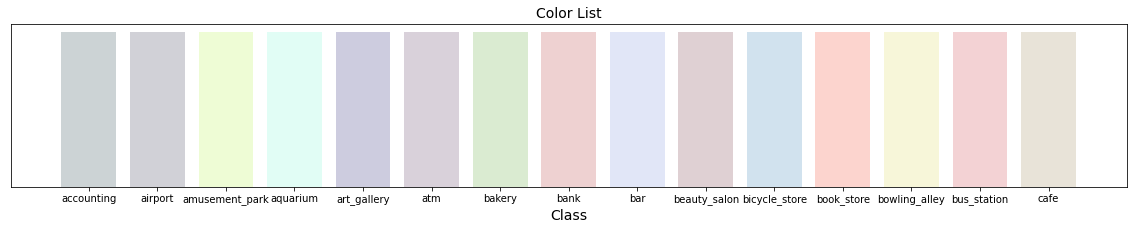

In [13]:
maxIndex = 15

Country = CLASS_LIST[:maxIndex]
New_Colors = COLOR_LIST[:maxIndex]
GDP_Per_Capita = [ 1 for i in range(len(COLOR_LIST[:maxIndex])) ]

plt.figure(figsize=(20, 3))
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Color List', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.yticks([])
plt.show()

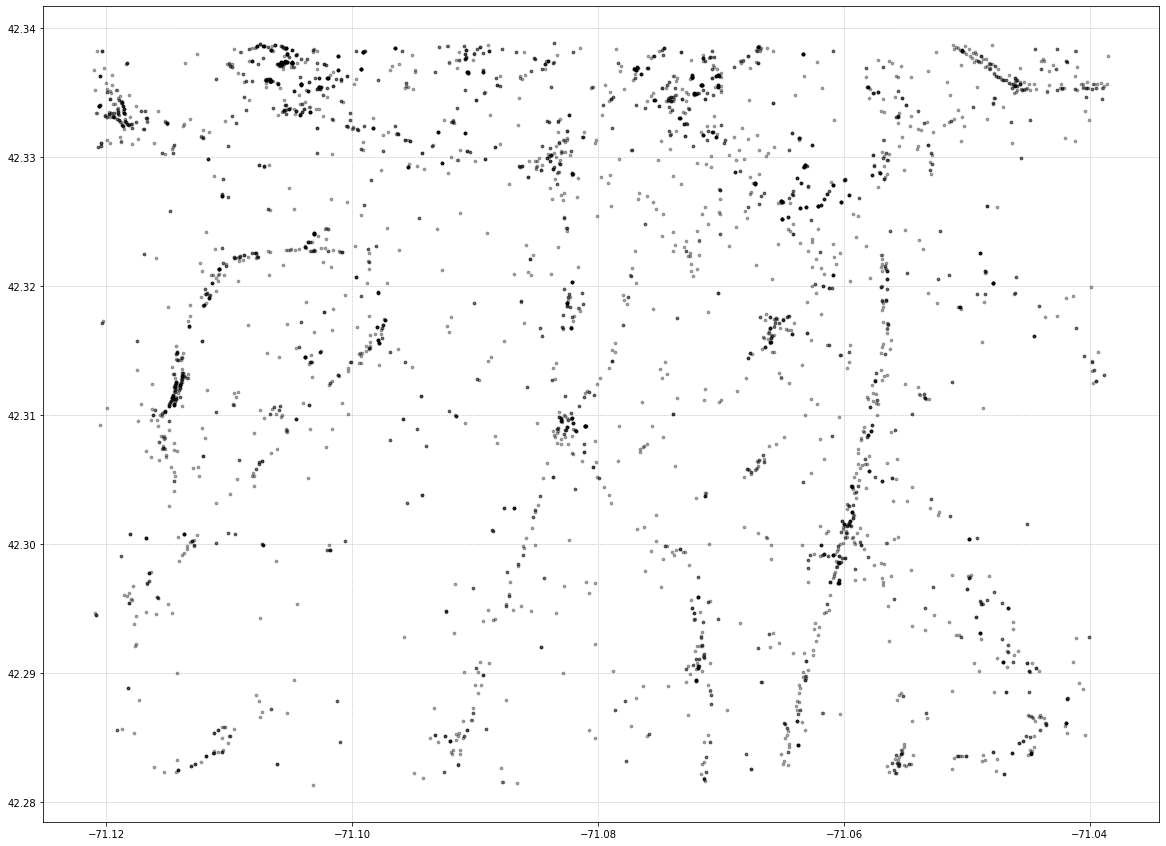

In [14]:
x = []
y = []
c = []

for i in dataDic:
    colorIndex = CLASS_LIST.index(i)
    # print(i)
    for pos in dataDic[i]:
        if (pos['lat'] != 0):
            x.append(pos['lat'])
            y.append(pos['lon'])
            c.append(COLOR_LIST[colorIndex])
        
plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, 0.33] )

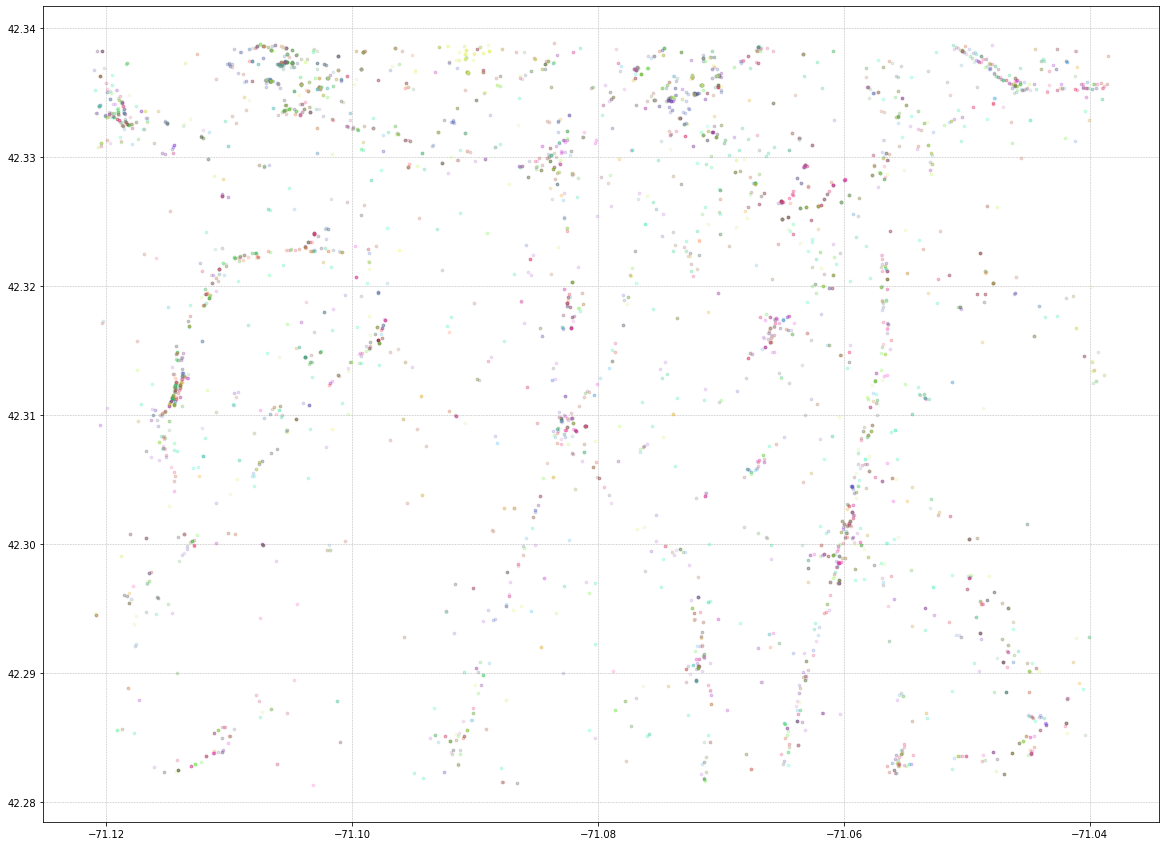

In [15]:
plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
for id in range(len(x)):
    plt.plot(y[id], x[id], 'o', markersize = 2.758, color = c[id] )

In [16]:
import folium
import matplotlib

In [17]:
min = [180, 180]
max = [-180, -180]

for i in dataDic:
    for pos in dataDic[i]:
        if (pos['lat'] != 0):
            if pos['lat'] < min[0]:
                min[0] = pos['lat']
            if pos['lon'] < min[1]:
                min[1] = pos['lon']
            if pos['lat'] > max[0]:
                max[0] = pos['lat']
            if pos['lon'] > max[1]:
                max[1] = pos['lon'] 

centerLat = min[0] + ((max[0] - min[0]) * 0.5)
centerLon = min[1] + ((max[1] - min[1]) * 0.5)

print(centerLat, centerLon)

42.31009385 -71.07977315


In [18]:
map = folium.Map(location=[centerLat, centerLon], zoom_start=14)

for i in dataDic:
    count = 0
    for pos in dataDic[i]:
        if (pos['lat'] == 0):
            continue
        # print(i)

        cIndex = CLASS_LIST.index(i)
        # print(cIndex)
        c = COLOR_LIST[cIndex]
        # print(c)
        hex = matplotlib.colors.to_hex(c)
        # print(hex)

        folium.Marker(
            [pos['lat'], pos['lon']], 
            popup=i, 
            icon = folium.Icon(
                icon_color=hex,
                color='black',
                )).add_to(map)

        count += 1
        if (count > 10) :
            break
map

### 2.3. Visualization, LA and Redlands

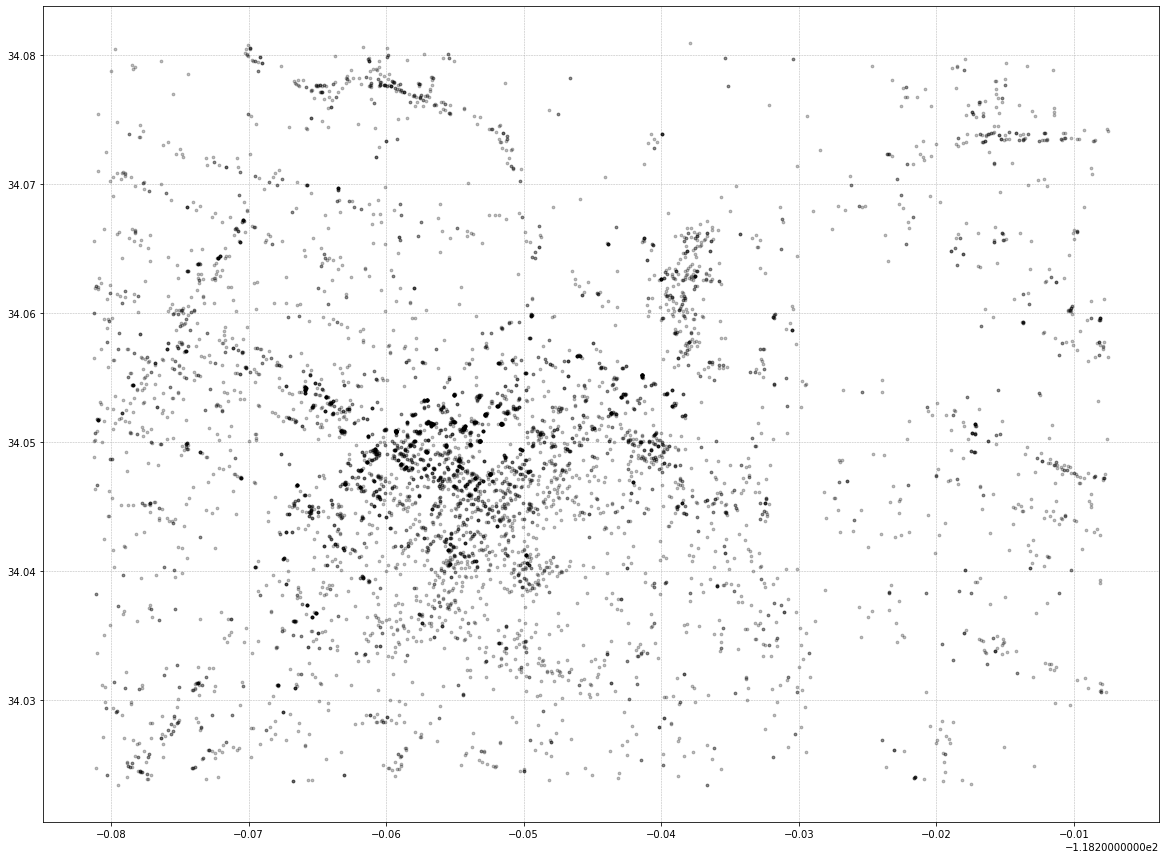

In [19]:
def getDataFromJSON(path):
    dataLA = OpenJson(path)
    x = []
    y = []
    c = []
    for i in dataLA:
        colorIndex = CLASS_LIST.index(i)
        # print(i, colorIndex)
        for pos in dataLA[i]:
            if (pos['lat'] != 0):
                x.append(pos['lat'])
                y.append(pos['lon'])
                c.append(COLOR_LIST[colorIndex])
            # break
        # break
    return [dataLA, x, y, c]

[dataLA, x, y, c] = getDataFromJSON('data/raw/google-third-place-LA.json')

plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, .25])



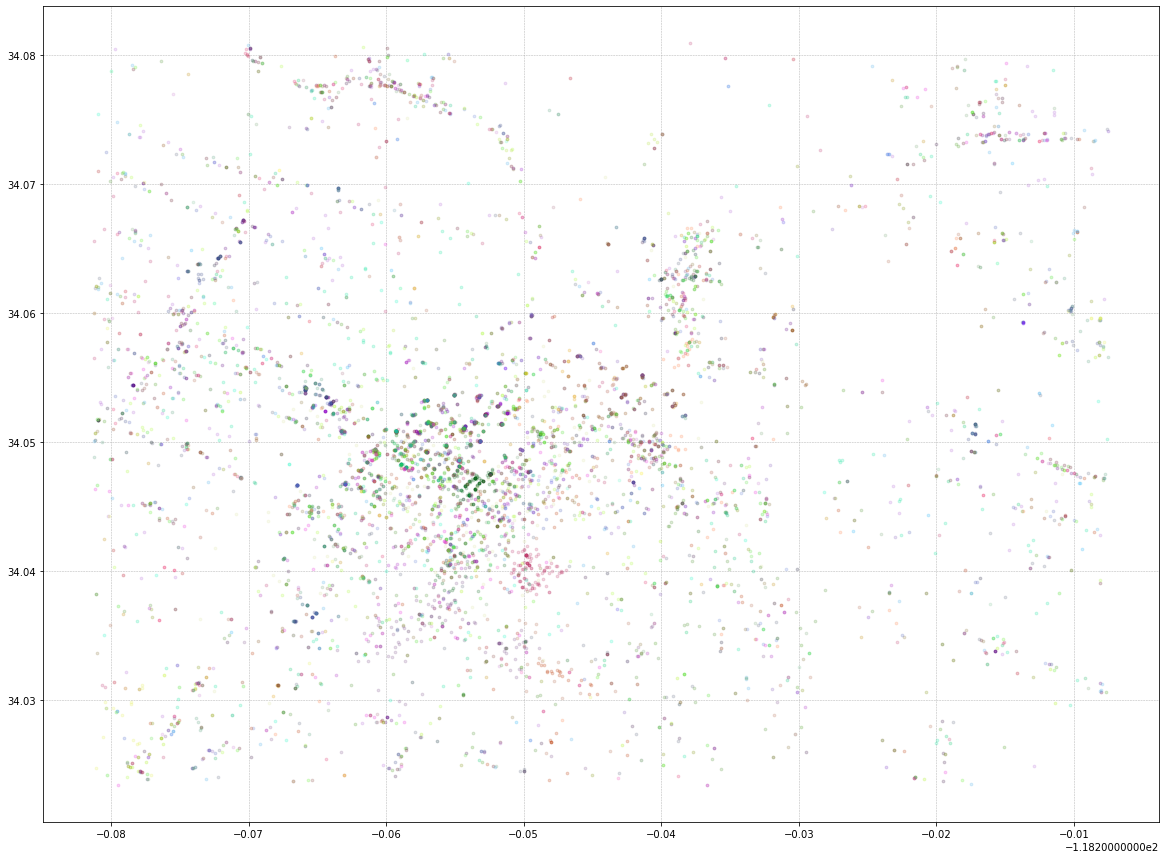

In [20]:
plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
for id in range(len(x)):
    plt.plot(y[id], x[id], 'o', markersize = 2.758, color = c[id] )

In [21]:
def getCenterLoc(data):
    min = [90, 180]
    max = [-90, -180]

    for i in data:
        for pos in data[i]:
            if (pos['lat'] != 0):
                if pos['lat'] < min[0]:
                    min[0] = pos['lat']
                if pos['lon'] < min[1]:
                    min[1] = pos['lon']
                if pos['lat'] > max[0]:
                    max[0] = pos['lat']
                if pos['lon'] > max[1]:
                    max[1] = pos['lon'] 

    return [
        min[0] + ((max[0] - min[0]) * 0.5),
        min[1] + ((max[1] - min[1]) * 0.5)
    ]
centerLoc = getCenterLoc(dataLA)
print(centerLoc)

[34.052181950000005, -118.24438315]


In [22]:
map = folium.Map(location=[centerLoc[0], centerLoc[1]], tiles='CartoDB dark_matter', zoom_start=14, width = "100%", height="100%")

for i in dataLA:
    count = 0
    for j in dataLA[i]:
        if (pos['lat'] != 0):
            lat = (j['lat'])
            lon = (j['lon'])

            cIndex = CLASS_LIST.index(i)
            # print(cIndex)
            c = COLOR_LIST[cIndex]
            # print(c)
            hex = matplotlib.colors.to_hex(c)

            folium.Marker(
                [lat, lon], 
                popup=i, 
                icon =  folium.Icon(
                    color="darkblue",
                    icon_color= hex,
                    )
                ).add_to(map)
            
            count += 1
        
        if (count > 10):
            break
map

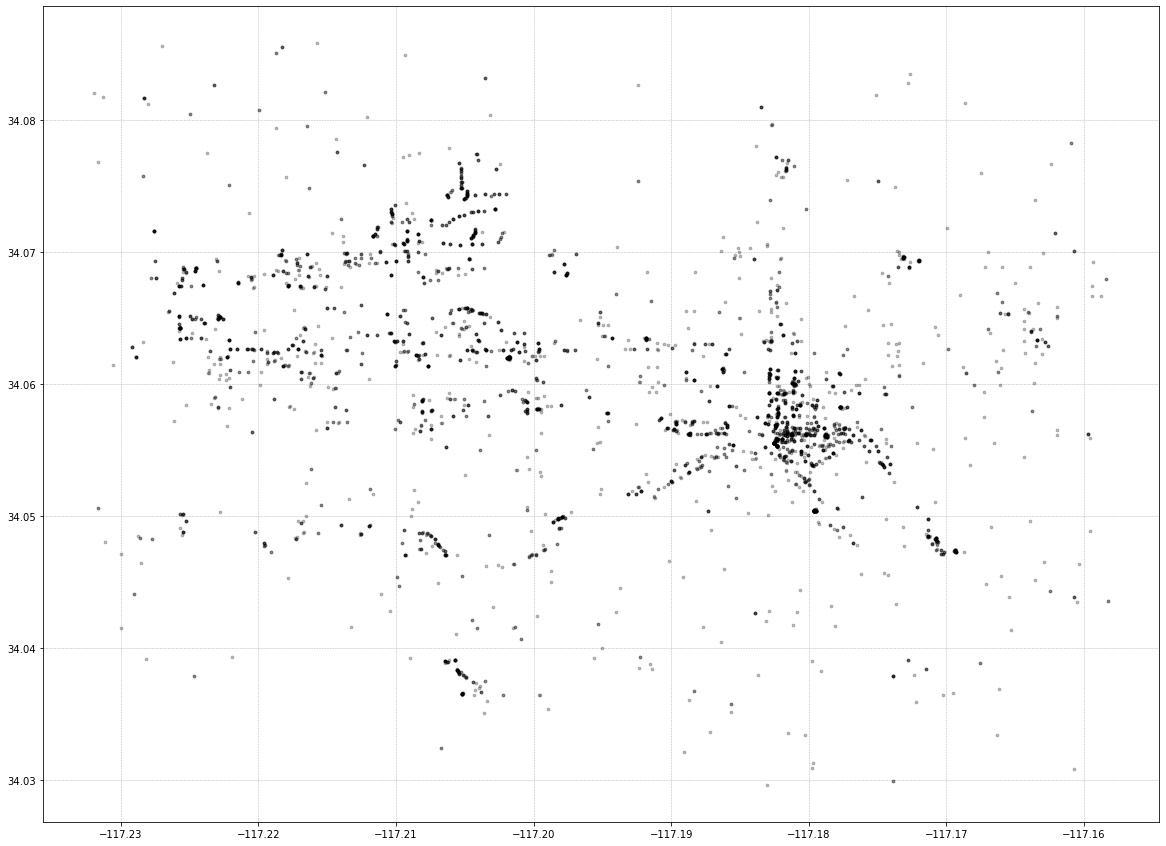

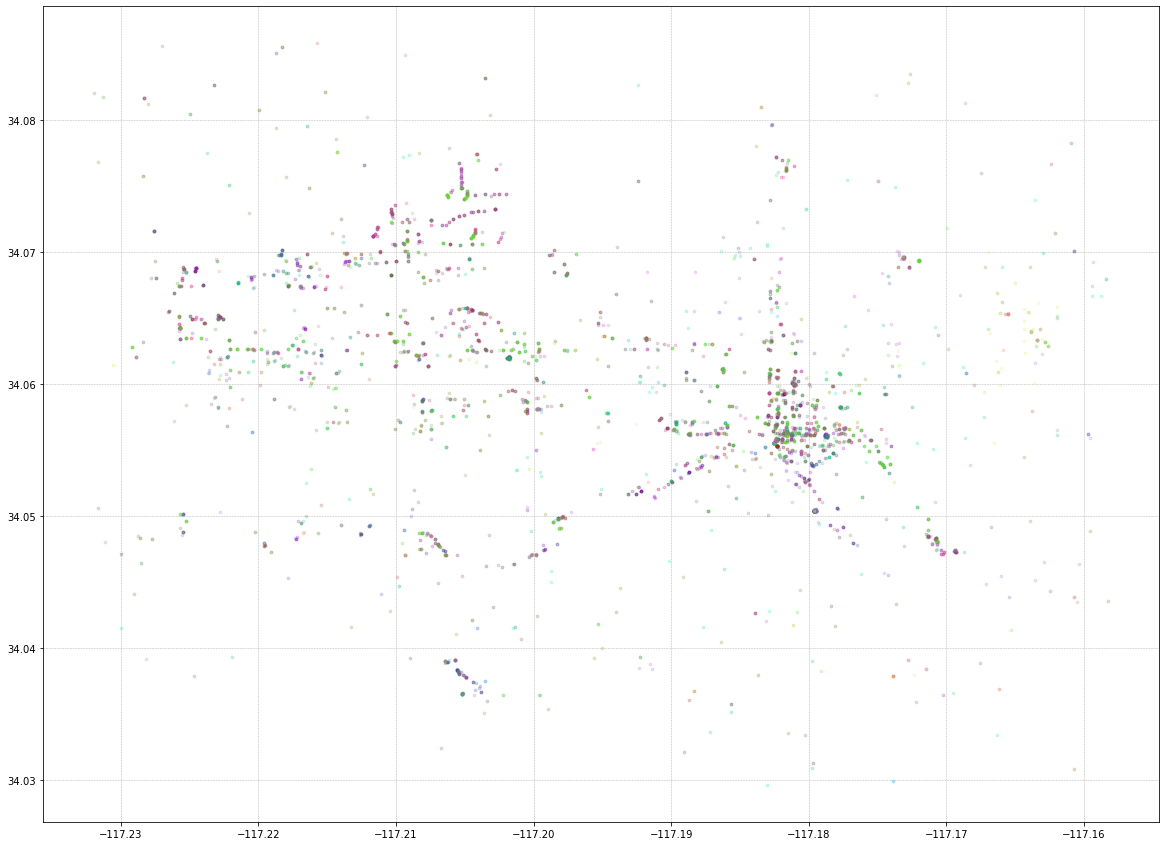

In [23]:
path = 'data/raw/google-third-place-Redlands.json'
[dataRedlands, x, y, c] = getDataFromJSON(path)

plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
plt.plot(y, x, 'o', markersize = 2.758, color = [0, 0, 0, .25])
plt.show()

plt.figure(figsize=(20,15))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.95)
for id in range(len(x)):
    plt.plot(y[id], x[id], 'o', markersize = 2.758, color = c[id] )
plt.show()

In [24]:
centerLoc = getCenterLoc(dataRedlands)

map = folium.Map(location=[centerLoc[0], centerLoc[1]], tiles='CartoDB dark_matter', zoom_start=14, width = "100%", height="100%")

for i in dataRedlands:
    count = 0
    for j in dataRedlands[i]:
        lat = (j['lat'])
        lon = (j['lon'])

        cIndex = CLASS_LIST.index(i)
        # print(cIndex)
        c = COLOR_LIST[cIndex]
        # print(c)
        hex = matplotlib.colors.to_hex(c)

        folium.Marker(
            [lat, lon], 
            popup=i, 
            icon =  folium.Icon(
                color="darkblue",
                icon_color= hex,
                )
            ).add_to(map)
        
        count += 1
        
        if (count > 10):
            break
map

-----
### References & Useful links

Lee, N. (2021). Understanding and Analyzing the Characteristics of the Third Place in Urban Design: A Methodology for Discrete and Continuous Data in Environmental Design. In: Yuan, P.F., Yao, J., Yan, C., Wang, X., Leach, N. (eds) Proceedings of the 2020 DigitalFUTURES. CDRF 2020. Springer, Singapore. https://doi.org/10.1007/978-981-33-4400-6_11



Oldenburg, R., Brissett, (1982). D.: The third place. Qual. Sociol. 5(4), 265–284



Lee, Namju. (2022). Computational Design, Seoul, Bookk, https://brunch.co.kr/@njnamju/144



Lee, Namju, (2022). Discrete Urban Space and Connectivity, https://nj-namju.medium.com/discrete-urban-space-and-connectivity-492b3dbd0a81



Woo. Junghyun, (2022). Numeric Network Analysis for Pedestrians, https://axuplatform.medium.com/0-numeric-network-analysis-47a2538e636c



Lee, Namju, (2022). Computational Design Thinking for Designers, https://nj-namju.medium.com/computational-design-thinking-for-designers-68224bb07f5c



Lee, Namju. (2016). Third Place Mobility Energy Consumption Per Person, http://www.njstudio.co.kr/main/project/2016_MobilityEnergyConsumptionMITMediaLab 
